# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [5]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('Store_CA.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductVariety       1650 non-null   int64  
 1   MarketingSpend       1650 non-null   int64  
 2   CustomerFootfall     1650 non-null   int64  
 3   StoreSize            1650 non-null   int64  
 4   EmployeeEfficiency   1650 non-null   float64
 5   StoreAge             1650 non-null   int64  
 6   CompetitorDistance   1650 non-null   int64  
 7   PromotionsCount      1650 non-null   int64  
 8   EconomicIndicator    1650 non-null   float64
 9   StoreLocation        1650 non-null   object 
 10  StoreCategory        1650 non-null   object 
 11  MonthlySalesRevenue  1650 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 154.8+ KB


In [6]:
data.head()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21
2,449,35,2654,142,92.8,14,11,6,101.1,Los Angeles,Grocery,292.11
3,666,9,2591,159,66.3,11,11,4,115.1,Sacramento,Clothing,279.61
4,657,35,2151,275,89.1,28,12,7,93.4,Palo Alto,Electronics,359.71


# My Question

### What is the correlation between advertizing and monthly sale revenue?

# My Analysis

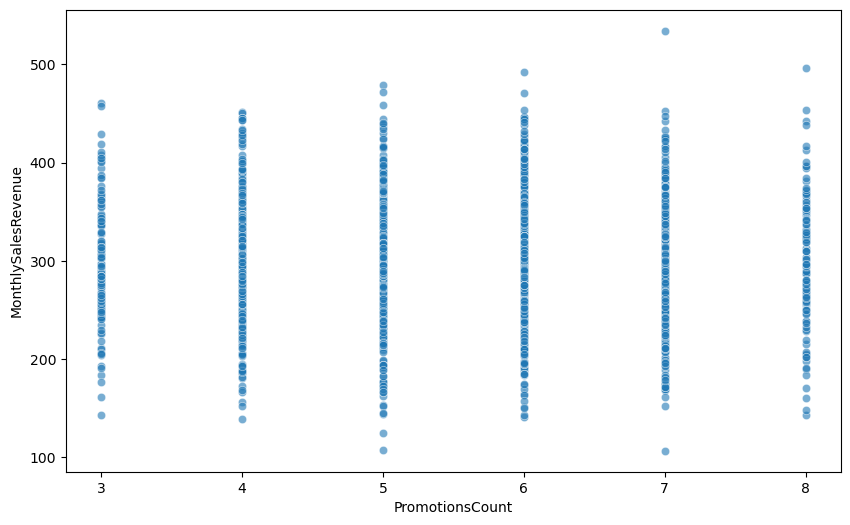

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['PromotionsCount'], y=data['MonthlySalesRevenue'], alpha=0.6)
plt.show()

In [69]:
correlation = data['PromotionsCount'].corr(data['MonthlySalesRevenue'])
correlation

-0.0026736943999894586

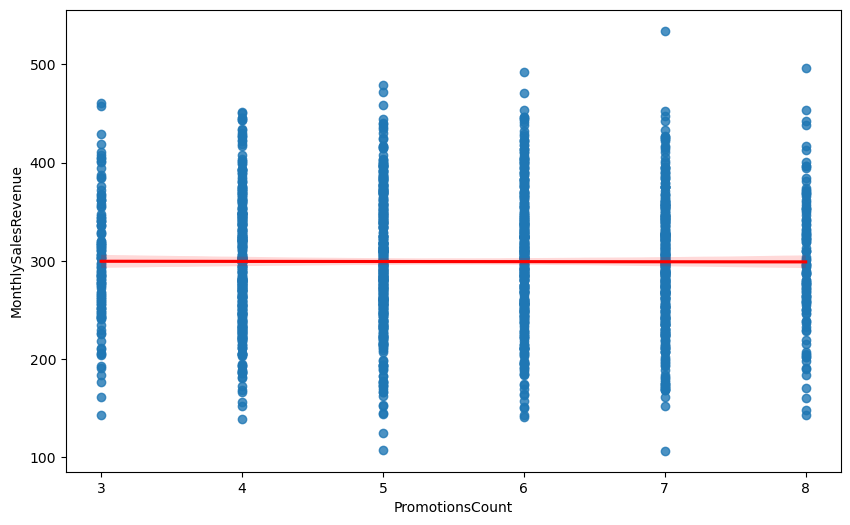

The coefficient of determination (R^2) is 7.1486417445349905e-06


In [71]:
plt.figure(figsize=(10, 6))
sns.regplot(x=data['PromotionsCount'], y=data['MonthlySalesRevenue'], line_kws={"color": "red"})
plt.show()
coefficent = correlation**2
print(f"The coefficient of determination (R^2) is {coefficent}")

Scatterplot: The scatterplot shows the distribution of data points but does not reveal a clear linear relationship between "PromotionsCount" and "MonthlySalesRevenue."


Pearson Correlation Coefficient (r): The correlation coefficient is approximately -0.0027, indicating almost no linear relationship between the two variables.


Regression Plot: A regression line is fitted, with a slope of -0.126 and an intercept of approximately 299.95.


The coefficient of determination (
𝑅
2
R 
2
 ) is 0.000007, meaning the model explains virtually none of the variability in sales revenue.

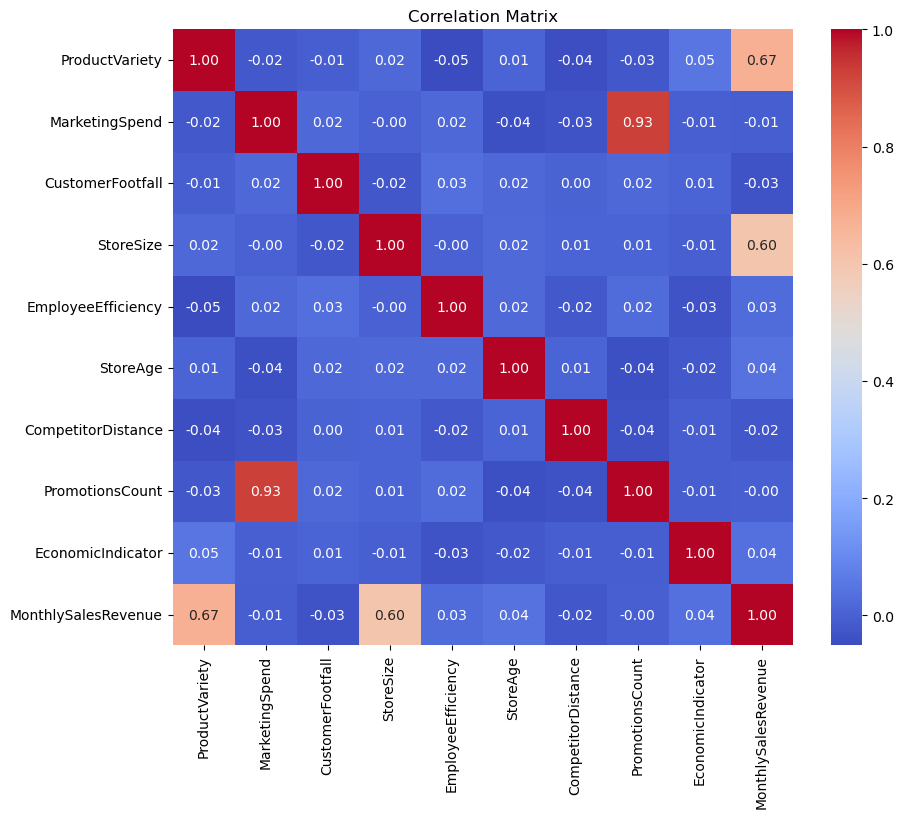

In [61]:
plt.figure(figsize=(10, 8)) ##Making Correlation Matrix 
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

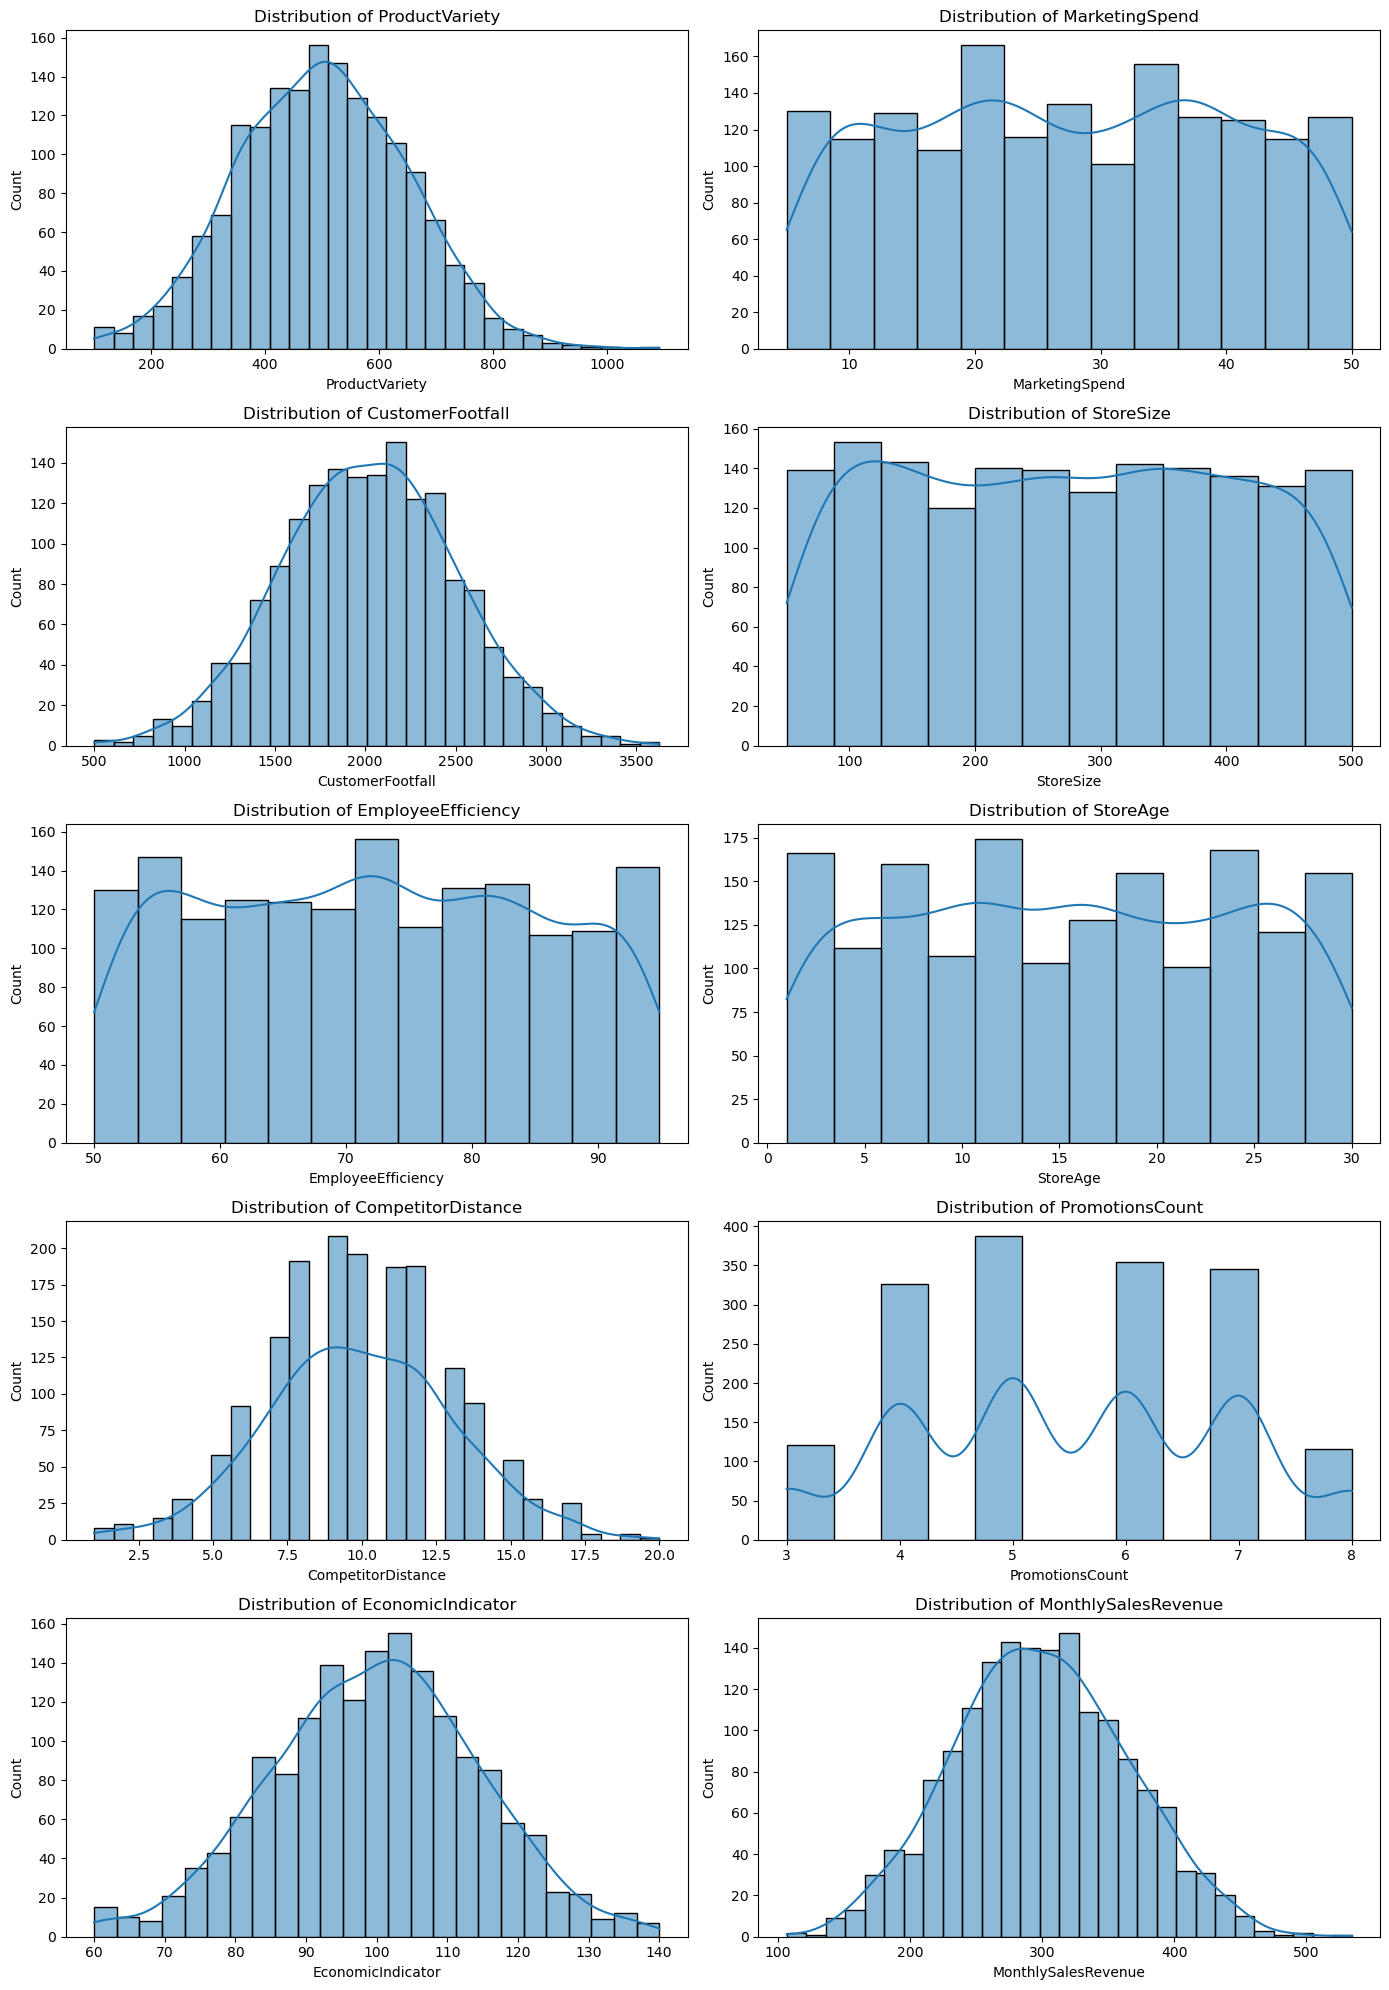

In [72]:
numerical_columns = [
    "ProductVariety", "MarketingSpend", "CustomerFootfall", "StoreSize",
    "EmployeeEfficiency", "StoreAge", "CompetitorDistance", "PromotionsCount",
    "EconomicIndicator", "MonthlySalesRevenue"]

fig, axes = plt.subplots(len(numerical_columns) // 2, 2, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

The following visualzations were created for two purposes. 1, they are fun to look at. The other, it is interesting to see the visualtions of all other variables in terms of the data set. 

As shown in this coorelation matrix of all applicable variables, it's no wonder why promotion count and monthly sales revenue are not related at all. A more determining variable to be looked at should have been either store size, or product variety, as these would have a much higher correlation. 